# Twitter Sentiment Analysis with LinearSVC and Logistic Regression

This report investigates the use of machine learning methods to forecast the sentiment of tweets. The dataset comprises 1.6 million tweets which are cleaned and pre-processed. Several cleaning techniques, such as removing URLs, user mentions, and special characters, are used to clean the dataset. Additionally, a connection to a MySQL database is established and the data is migrated. The dataset is evenly distributed, with 800,000 negative and positive tweets. A word cloud is created for all tweets, negative tweets and positive tweets taking stop words away, showing the most frequently used words in the dataset. As for the machine learning part of the report, LinearSVC and Logistic Regression models are used to predict tweet polarity. Classification reports and confusion matrices are used to compare the performance of the models.


## Introduction
In this study, we apply machine learning techniques to predict whether a tweet is positive or negative after cleaning and pre-processing a dataset of 1.6 million tweets. We begin by deleting from the tweets URLs, user mentions, special characters, and digits, after which we lowercase the words and eliminate any additional spaces. To investigate the most frequently used words in critical tweets, we illustrate the distribution of the data and construct a word cloud. We use the TfidfVectorizer to extract features from the text and fit our models, including LinearSVC and Logistic Regression, after dividing the data into training and testing sets. We assess and compare the performance of our models using classification reports and confusion matrices. This report's comprehensive study of text data preparation is presented.

In [2]:
import pandas as pd 
import nltk
import re
import pymysql

df = pd.read_csv("training.1600000.processed.noemoticon.csv",usecols=[0, 5] ,header=None,encoding='latin')

In [11]:
print(df)

         0                                                  5
0        0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1        0  is upset that he can't update his Facebook by ...
2        0  @Kenichan I dived many times for the ball. Man...
3        0    my whole body feels itchy and like its on fire 
4        0  @nationwideclass no, it's not behaving at all....
...     ..                                                ...
1599995  4  Just woke up. Having no school is the best fee...
1599996  4  TheWDB.com - Very cool to hear old Walt interv...
1599997  4  Are you ready for your MoJo Makeover? Ask me f...
1599998  4  Happy 38th Birthday to my boo of alll time!!! ...
1599999  4  happy #charitytuesday @theNSPCC @SparksCharity...

[1600000 rows x 2 columns]


In [3]:
df.columns = ['pola', 'text']

The code below cleans up the text of each tweet in the data frame in a number of different ways. Regular expressions are used in the first four lines of code to eliminate URLs, user mentions (@), numerals, and special characters from each tweet. The fifth line changes all the text to lowercase, which can assist the dataset's unique word count decline. The additional whitespace between words is eliminated in the final line.

In [4]:
# Remove URLs from tweets

df['clean_tweet'] = df['text'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove user mentions (@)
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub(r'@[A-Za-z0-9_]+', '', x))

# remove numbers and special characters
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub('[^a-zA-Z\s]', '', x))

# to lowercase
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: x.lower())

#Remove spaces
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub(r'\s+', ' ', x))

df = df.drop(['text'], axis=1)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   pola         1600000 non-null  int64 
 1   clean_tweet  1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB
None


## Database
After cleaning the data, we establish a connection to the MySQL database and create a cursor object to execute SQL statements We use a for loop to iterate through each row of the DataFrame to migrate the data, and then we use an INSERT statement with parameterized values to put the data into the tweets table in the database

In [ ]:
# establish connection to database
conn = pymysql.connect(host='127.0.0.1', user='root', password='', db='onboarding1')

# create a cursor object
cursor = conn.cursor()

# insert the data into the tweets table
for index, row in df.iterrows():
    query_insert = "INSERT INTO tweets (pola, clean_tweet) VALUES (%s, %s)"
    cursor.execute(query_insert, (row['pola'], row['clean_tweet']))

# commit the changes to the database
conn.commit()

# close the cursor and connection objects
cursor.close()
conn.close()

## Distribution of data
After cleaning the data, the next step is to visualize the distribution of sentiment in the dataset and create a word cloud for the negative, positive, and all tweets. 

The code below generates a simple bar chart that displays the distribution of positive and negative tweets based on the pola column, which represents the sentiment of the tweet and adds a label on top of each bar to show the count.

In [7]:
print(df.columns)

Index(['pola', 'clean_tweet'], dtype='object')


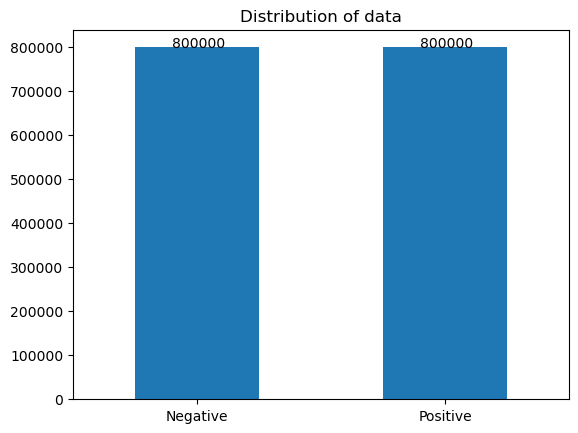

In [8]:
import matplotlib.pyplot as plt

# Get the count for each class
class_count = df['pola'].value_counts()

# Plot the distribution for dataset
ax = class_count.plot(kind='bar', title='Distribution of data', legend=False)
ax.set_xticklabels(['Negative', 'Positive'], rotation=0)

# Add SUM label
for i, v in enumerate(class_count):
    ax.text(i - 0.1,v,str(v), color='black')

plt.savefig('distribution_of_negative_and_positive_tweets.svg', format='svg')

The bar chart shows that the dataset is evenly distributed, with 800,000 tweets that are positive and 800,000 tweets that are negative. The earliest few rows of the dataset have a pola value of 0, while the last few rows have a pola value of 4, as can be seen when looking at the dataset's head and tail. Moreover, we can prove that the positive tweets begin with tweet 800,000 by printing rows 799,995 to 800,005 like it's shown in the rows below:

In [5]:
print(df.iloc[799995:800005])

        pola                                        clean_tweet
799995     0   sick spending my day laying in bed listening to 
799996     0                                     gmail is down 
799997     0                       rest in peace farrah so sad 
799998     0   sounds like a rival is flagging your ads not ...
799999     0  has to resit exams over summer wishes he worke...
800000     4                          i love u guys r the best 
800001     4  im meeting up with one of my besties tonight c...
800002     4   thanks for the twitter add sunisa i got to me...
800003     4  being sick can be really cheap when it hurts t...
800004     4                    he has that effect on everyone 


In [5]:
print(df.head(), df.tail())

   pola                                        clean_tweet
0     0   awww thats a bummer you shoulda got david car...
1     0  is upset that he cant update his facebook by t...
2     0   i dived many times for the ball managed to sa...
3     0    my whole body feels itchy and like its on fire 
4     0   no its not behaving at all im mad why am i he...          pola                                        clean_tweet
1599995     4  just woke up having no school is the best feel...
1599996     4   thewdbcom very cool to hear old walt interviews 
1599997     4  are you ready for your mojo makeover ask me fo...
1599998     4  happy th birthday to my boo of alll time tupac...
1599999     4                              happy charitytuesday 


## Wordcloud
We can produce three different word clouds: one for negative tweets, one for positive tweets, and one for all tweets combined now that we know the threshold between positive and negative tweets. With stopwords like "the," "a,"  "i’m," "u," and "an" excluded, the following code snippet shows how to create a word cloud for all tweets in our dataset.


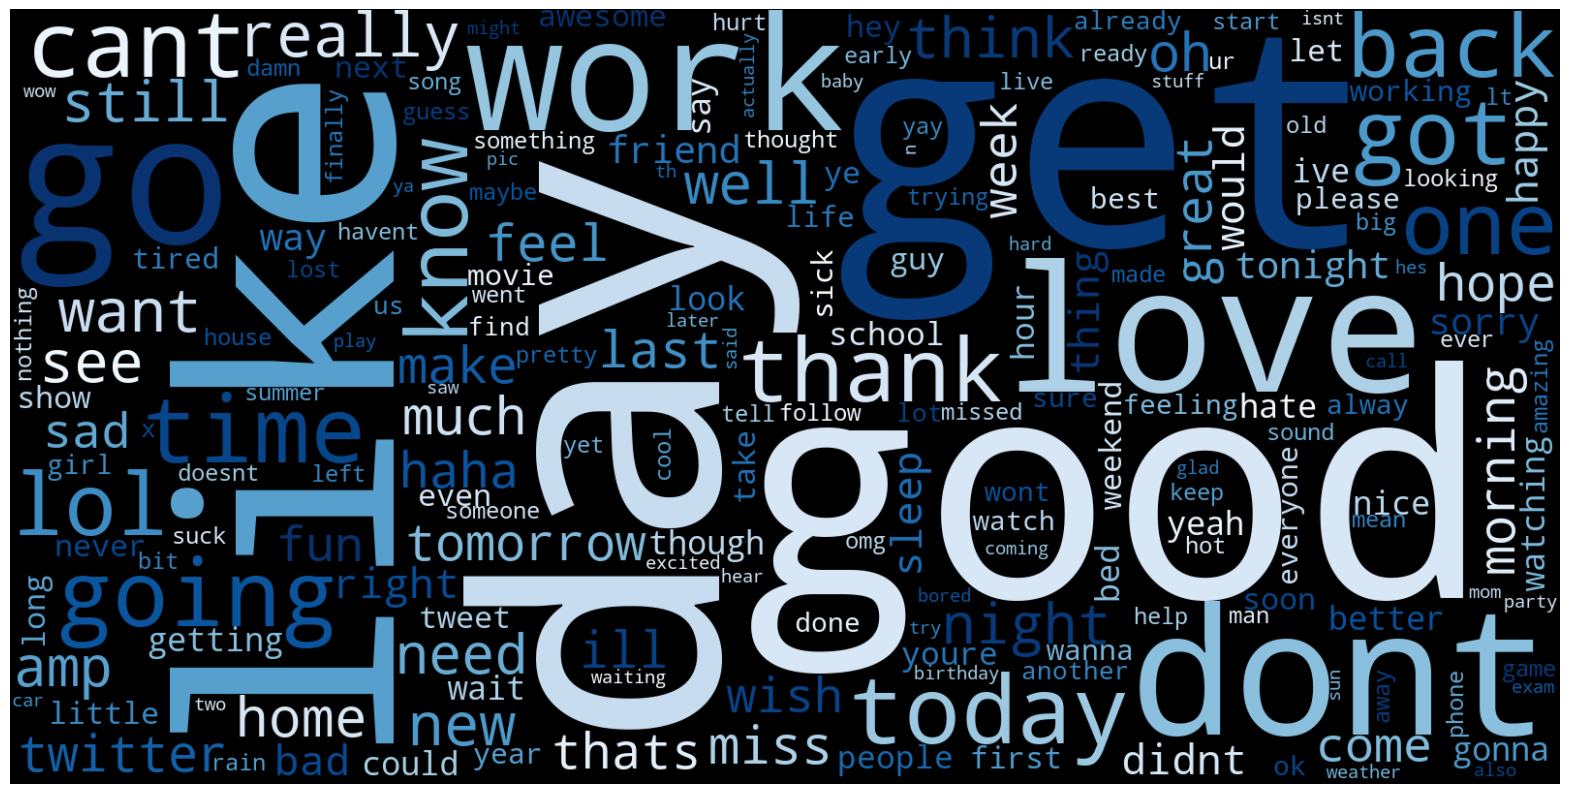

In [39]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

#Set the stop words to be removed from the wordcloud and add the words `i'm` and `u`
stop_words = set(stopwords.words('english'))
stop_words.update(['im', 'u'])

#Join all the clean_tweet column text into a single string
text = ' '.join(df['clean_tweet'].tolist())

#Create a WordCloud
wc = WordCloud(background_color='black', contour_width=3, 
contour_color='black',max_words=200, width=1600, height=800,
stopwords=stop_words ,colormap='Blues', collocations=False).generate(text)

#Create a figure 
plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_all.svg', format='svg', dpi=400)

According to the word cloud, the phrases "like," "day," "get," "love," "good," "don't," "can't," "go," "lol," "going," and "love" are the ones that appear in the dataset the most frequently.

To make a word cloud for negative tweets only we can execute the following code which takes the first 800,000 rows of the joined string as the negative tweets.

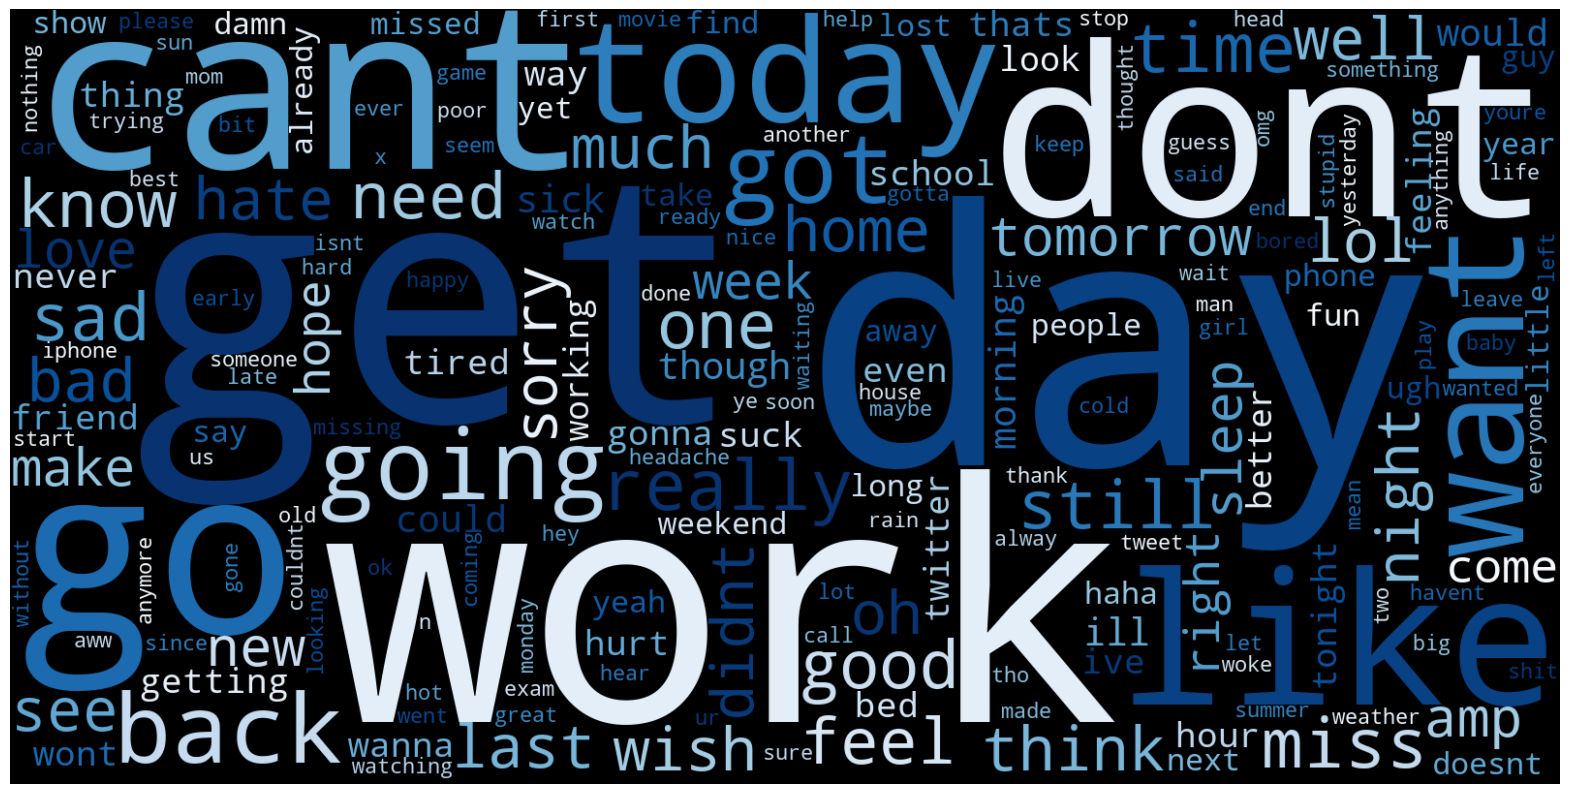

In [ ]:
#Take the first 800,000 rows of the joined string as the negative tweets
neg_tweets = ' '.join(df.iloc[:800000]['clean_tweet'].tolist())

#Generate the wordcloud
wc = WordCloud(background_color='black', contour_width=3, 
contour_color='black',max_words=200, width=1600, height=800,
stopwords=stop_words ,colormap='Blues_r', collocations=False).generate(neg_tweets)

plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_negative.svg', format='svg', dpi=300)
#plt.show()


From the word cloud above we can see that the most frequent words in the word cloud, which represent the negative tweets, are "can't," "get," "day," "work," "go," "don't," "like," and "work." These words could indicate the most common issues or complaints expressed in the negative tweets.

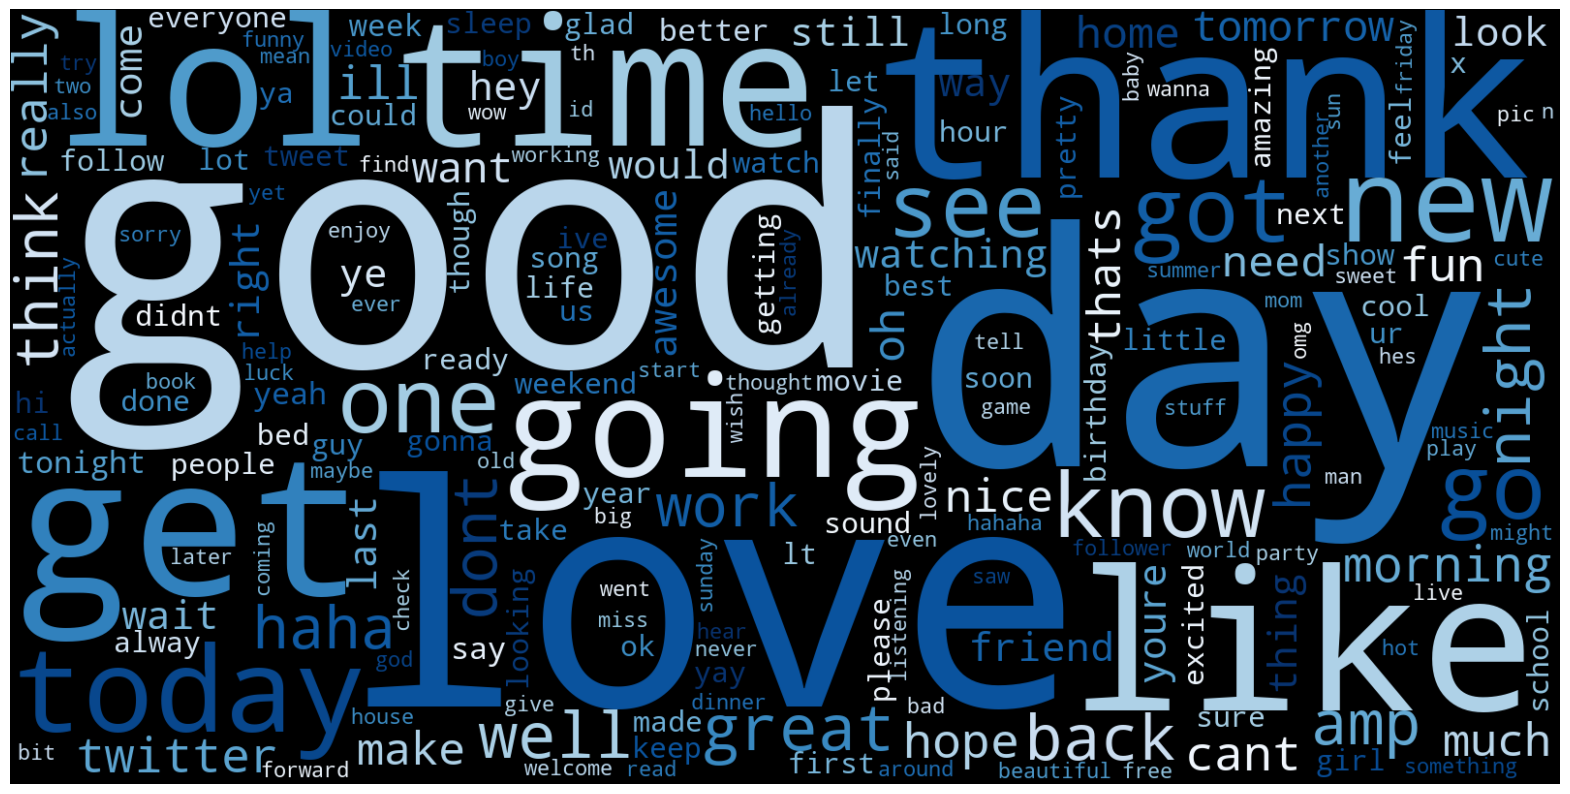

In [38]:
pos_tweets = ' '.join(df.iloc[800000:]['clean_tweet'].tolist())
stop_words.update(['u'])
wc = WordCloud(background_color='black', contour_width=3, 
contour_color='black',max_words=200, width=1600, height=800,
stopwords=stop_words ,colormap='Blues', collocations=False).generate(pos_tweets)

plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_positive.svg', format='svg', dpi=400)

# Sklearn
Moving on to the machine learning part of the analysis, we will use logistic regression and LinearSVC models from scikit-learn to classify the sentiment of tweets. These models will help us predict whether a tweet is positive or negative based on its words. Both logistic regression and LinearSVC are linear models used for classification tasks. The difference between them is in how they draw the decision boundary that separates the different categories. LinearSVC tries to draw a straight line (or plane in higher dimensions) to divide the categories (figure below), while logistic regression creates an S-shaped curve that moves progressively from one group to the next (figure below).We will train our models on a portion of our data and test them on the remaining data to see how accurately they can classify tweets.

In our case, we have divided the dataset into 95% and 5% for training and testing respectively.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['clean_tweet'], df['pola'], test_size=0.05, random_state=6)

A TfidfVectorizer object is created with the ngram range set from 1 to 2 and the maximum number of features is set to 500000. Then, the fit method is called on the vectorizer object with the training data X_train passed as an argument. This generates a vocabulary of words and phrases (pairs of two adjacent words in our case) and their corresponding TF-IDF scores based on the frequency of occurrence of each term in the training data. This vocabulary is used to transform the text data in the training and testing datasets into a numerical format that can be used as input for machine learning models.


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

The followin code transforms the raw text data in X_train and X_test into numerical feature vectors using the previously fit TfidfVectorizer object named vectoriser.


In [10]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

## LinearSVC
After vectorizing the raw text, we can create a support vector machine (SVM) model using the LinearSVC algorithm, train it on the training data, and use it to predict the class labels for the test data. The classification_report() function is then used to generate a report of various classification metrics, for each class label (negative and positive).


              precision    recall  f1-score   support

    Negative       0.82      0.80      0.81     39941
    Positive       0.81      0.82      0.82     40059

    accuracy                           0.81     80000
   macro avg       0.81      0.81      0.81     80000
weighted avg       0.81      0.81      0.81     80000



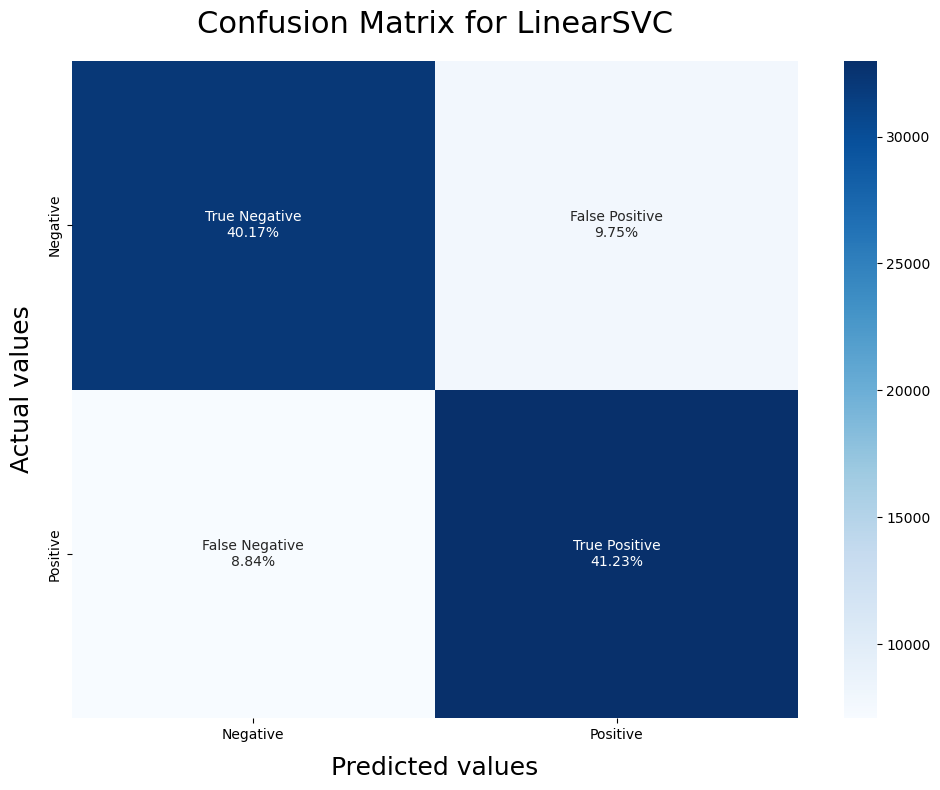

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

#Define the model and fit it to the training data
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
#Use the trained model to predict on the test data
y_pred = SVCmodel.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive'], output_dict=False))

#Creating and plotting the confusion matrix

#Generating the confusion matrix using the predicted and true labels
cf_matrix = confusion_matrix(y_test, y_pred)

#Setting the categories of the matrix
categories = ['Negative','Positive']
#Setting the group names
group_names = ['True Negative','False Positive', 'False Negative','True Positive']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

#Forming the labels
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

#Creating the figure and axes for the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='', xticklabels=categories, yticklabels=categories, ax=ax)

#Labels for X axis, Y axis and a title
plt.xlabel("Predicted values", fontdict={'size': 18}, labelpad=10)
plt.ylabel("Actual values", fontdict={'size': 18}, labelpad=10)
plt.title("Confusion Matrix for LinearSVC", fontdict={'size': 22}, pad=20)

plt.tight_layout()
plt.savefig('confusion_matrix_linearSVC.svg')


The confusion matrix helps the visualize the outcome of our learning model. The confusion matrix in this instance reveals that, of all the real negative cases, 40.17% were accurately labeled as negative (true negatives), whereas 8.84% were mistakenly categorized as positive (false negatives). Contrarily, out of all the real positive instances, 41.23% were accurately characterized as positive (genuine positives), while 9.75% were mistakenly categorized as negative (false positives). 

## Logistic regression
The next classification used was logistic regression which was used to binary classify our tweets based on the sentiment. The result we got was slightly higher (by 1%) than the LinearSVC model, resulting in 0.82 accuracy.


              precision    recall  f1-score   support

    Negative       0.83      0.81      0.82     39941
    Positive       0.82      0.83      0.83     40059

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



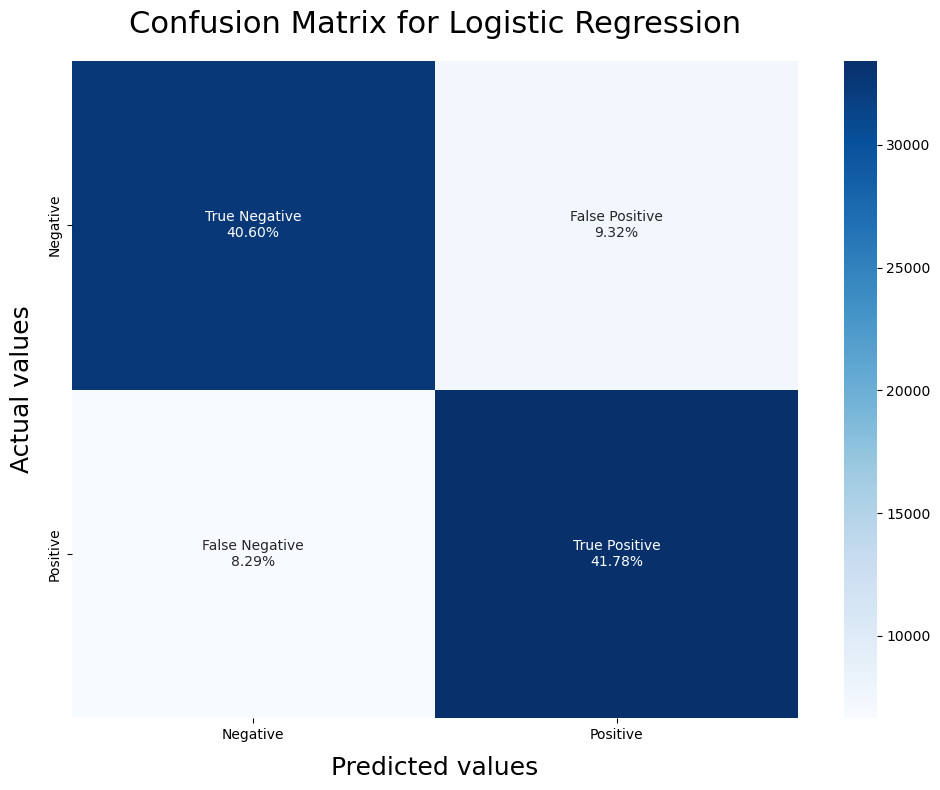

In [19]:
# create a logistic regression model with hyperparameters
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
# fit the model to the training data
LRmodel.fit(X_train, y_train)
#Use the trained model to predict on the test data
y_pred = LRmodel.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive'], output_dict=False))

#Creating and plotting the confusion matrix

#Generating the confusion matrix using the predicted and true labels
cf_matrix = confusion_matrix(y_test, y_pred)

#Setting the categories of the matrix
categories = ['Negative','Positive']
#Setting the group names
group_names = ['True Negative','False Positive', 'False Negative','True Positive']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

#Forming the labels
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

#Creating the figure and axes for the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='', xticklabels=categories, yticklabels=categories, ax=ax)

#Labels for X axis, Y axis and a title
plt.xlabel("Predicted values", fontdict={'size': 18}, labelpad=10)
plt.ylabel("Actual values", fontdict={'size': 18}, labelpad=10)
plt.title("Confusion Matrix for Logistic Regression", fontdict={'size': 22}, pad=20)

plt.tight_layout()
plt.savefig('confusion_matrix_logistic_regression.svg')

Based on the confusion matrix above, we observe a slightly higher number of true values (true negatives and true positives) compared to the LinearSVC model. Therefore, we can conclude that with the given parameters and the pre-processed data, logistic regression has a better accuracy rate and performs better than the LinearSVC model.